<center>
    <h1> Reconocimiento de patrones y aprendizaje automático</h1>
    <h1>Tarea 1: Regresión</h1>
    <h2>González Alvarado Raúl : 313245312</h2>
</center>

## 1. Contesta las siguientes preguntas.

**1.a.** ¿Qué tipo de problemas se pueden resolver mediante regresión?

La regresión resuelve problemas en los que se quiere saber sobre tendencias, o donde dado un conjunto de datos se quiere encontrar un modelo que represente a esos datos, y (no siempre es necesario) a datos similares pero que no sean conocidos.
Por ejemplo, dado un dato $n$-dimensional que no conocemos, poder predecir su valor correspondiente $y$.

Algunos ejemplos son:
- Estimar el precio de una casa dependiendo de la cantidad de cuartos, pisos y metros cuadrados.
- Predecir las ganancias de una compañía el siguiente mes, basándonos en las ganancias de meses anteriores.
- Estimar el nivel de satisfacción de un país dependiendo del producto interno bruto.

**1.b.** ¿La siguiente ecuación es un modelo de regresión lineal?
$Y = \beta_0 + \beta_1X_1 + \beta_2X_1^2$

Sí lo es. Porque tenemos una combinación lineal de los parámetros ajustables, es decir una combinación lineal de las $\beta_i$.

**1.c.** En regresión lineal, ¿Cómo se define e interpreta el coeficiente $R^2$?

$R^2$ es una medida del ajuste del modelo a los datos, nos dice qué porcentaje de los datos en un conjunto dado se están prediciendo correctamente con ese modelo. Su definición es:
$$R^2 = \frac{Var(y) - E}{Var(y)}$$

Donde $Var(y)$ es la varianza en los valores reales del conjunto de datos, y $E$ es el error cometido por el modelo.

**1.d.** ¿Es conveniente utiliza el valor $R^2$ en regresión no lineal? En caso contrario, ¿qué métrica o valor se puede utilizar?

Sí lo veo conveniente, porque se sigue teniendo que el promedio es un mal modelo para representar a los datos, además de que la función de error ($MSE$) penaliza los errores según la distancia de la predicción al dato real.

**1.e.** ¿Qué es el sobre entrenamiento en una regresión?

Es cuando (durante el entrenamiento) el modelo resultante se adapta a todos y cada uno de los datos usados en el entrenamiento, es decir que obtine la $y$ correcta para cada uno de esos datos. Esto puede ocasionar que el modelo sea malo prediciendo datos nuevos.

**1.f.** Supongamos que los resultados de una regresión muestran que el coeficiente de regresión es $R^2 = 1$. ¿Podría este modelo estar sobre entrenado? Justifica tu respuesta.

Lo más posible es que sí esté sobreentrenado, es decir que el error del modelo es 0 y se está ajustando a todos y cada uno de los datos del entrenamiento. Otra posibilidad es que los datos se "comporten" muy bien y todos están completamente alineados para que el error del modelo sea cero.

## 2. Peso y altura.
El archivo `weight-height.csv` contiene los datos de peso (libras) y estatura (pulgadas) de hombres y mujeres. Realice los siguientes ejercicios:

- a) Realice una gráfica de puntos: peso (eje $y$) vs altura (eje $x$), que muestre la relación entre ambas variables.
- b) Calcule el coeficiente de correlación de Pearson entre peso y altura.
- c) Realice y grafique una regresión lineal para calcular el peso de una persona en función de su altura. Proporcione los coeficientes de la regresión.
- d) Calcule e interprete el coeficiente de determinación $R^2$.
- e) Grafique un histograma de los valores residuales de la regresión.
- f) ¿Cuál es el error esperado al hacer una predicción con este modelo?
- g) Calcule y grafique un intervalo de confianza de la regresión con un valor de confianza del 90%.
- h) Dada una predicción del peso en función de la altura con este modelo, ¿cuál es la probabilidad de que el error entre el valor observado y la predicción sea menor a 20 libras? Justifique su respuesta.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
data = pd.read_csv("./weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
reshape = lambda S : S.values.reshape(len(S), 1)
X = reshape(data["Height"])
y = reshape(data["Weight"])

**Inciso b)** Correlación entre los datos

In [4]:
m = np.mean(y)
print("Mean:", m)
print("STD:", np.std(y))
print("Var:", np.var(y))

print("Correlación entre peso y altura:", data.corr().iloc[0,1])

Mean: 161.44035683283076
STD: 32.106833544431716
Var: 1030.8487602498458
Correlación entre peso y altura: 0.9247562987409196


**Inciso a)** Gráfica de los datos

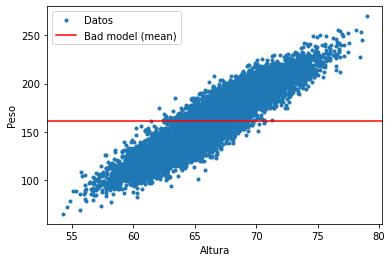

In [5]:
plt.plot(X, y, '.', label="Datos")
plt.axhline(y=m, linestyle='-', color='r', label='Bad model (mean)')
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.legend()
plt.show()

**Inciso c)** Entrenamiento del modelo.

In [6]:
model = LinearRegression()
model.fit(X, y)

y_predicts = model.predict(X)
mse = mean_squared_error(y, y_predicts)
print("R2:", model.score(X, y))
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

R2: 0.8551742120609958
MSE: 149.29348394912964
RMSE: 12.218571272826035


**Inciso d)** Interpretación de $R^2$

Se obtuvo $R^2 \approx 0.8551$ que significa que con este modelo podemos describir al 85% de nuestros datos (aproximadamente).


**Inciso c)** Parámetros del modelo

In [7]:
print(model.coef_)
print(model.intercept_)

[[7.71728764]]
[-350.73719181]



$$peso(altura) = -350.73 + 7.71*altura$$

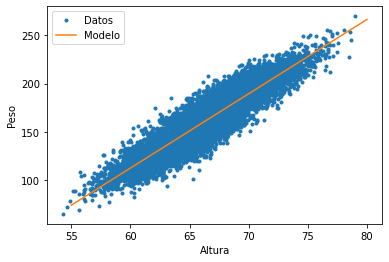

In [8]:
n_new = 100
X_new = np.linspace(55,80, n_new).reshape(n_new, 1)

plt.plot(X, y, '.', label="Datos")
plt.plot(X_new, model.predict(X_new), '-', label="Modelo")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.legend()

**Inciso e)** Histograma de residuales

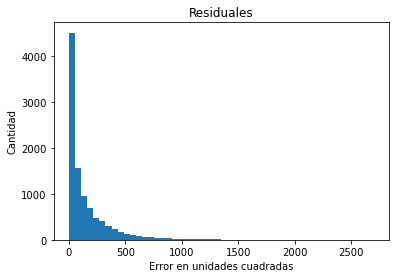

In [9]:
residuals = (y - model.predict(X)) ** 2

plt.hist(residuals, 50)
plt.xlabel("Error en unidades cuadradas")
plt.ylabel("Cantidad")
plt.title("Residuales")
plt.show()

**Inciso f)** Error esperado al hacer predicciones.

Sacamos el error promedio, pero como está en unidades cuadradas también sacamos su raíz cuadrada para tenerlo en libras.

In [10]:
ee = np.sqrt(np.mean(residuals))
print("Expected error:", ee, "libras")

Expected error: 12.218571272826035 libras


**Inciso g)** Intervalo de confianza

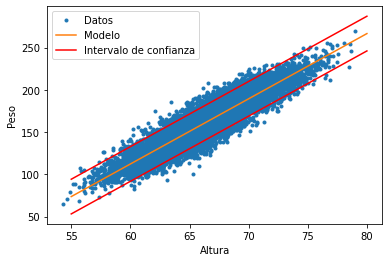

In [11]:
r_std = np.std(residuals)
cutoff = np.sqrt(2*r_std)

n_new = 100
X_new = np.linspace(55,80, n_new).reshape(n_new, 1)

plt.plot(X, y, '.', label="Datos")
plt.plot(X_new, model.predict(X_new), '-', label="Modelo")
plt.plot(X_new, model.predict(X_new)+cutoff, 'r-', label="Intervalo de confianza")
plt.plot(X_new, model.predict(X_new)-cutoff, 'r-')
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.legend()

**Inciso h)** Error menor a 20 libras

In [12]:
lib = 20
cdf = ECDF(residuals.T[0,:])
print("Probabilidad de que el error sea menor a {} libras:\n{}".format(lib, cdf(lib**2)))

Probabilidad de que el error sea menor a 20 libras:
0.9006000000000001


## 3. Regresión no lineal.
El archivo `data.csv` contiene dos columnas, una con la variable independiente $X$ y la otra con la variable dependiente $Y$. Realice los siguientes ejercicios:

- a) Realice una gráfica de puntos: $Y$ vs $X$, que muestre la relación entre ambas variables.
- b) Implemente una forma para identificar y eliminar outliers en este conjunto de datos.
- c) Proponga y grafique un modelo de regresión que describa la relación entre las variables $X$ y $Y$. Proporcione los coeficientes de la regresión. Sugerencia: La relación entre $X$ y $Y$ **no es lineal** y no es logarítmica.
- d) Obtén el coeficiente de determinación $R^2$ e interpreta.
- e) Grafique el histograma de residuales para este modelo.
- f) ¿Cuál es el error esperado al hacer una predicción con este modelo de regresión?
- g) ¿Cuál es la probabilidad de que una predicción realizada con este modelo tenga un error mayor a 500?

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
data = pd.read_csv("data.csv")
data = data.sort_values("X")
data.head()

,X,Y
58,-10.0,-2864.066134
122,-9.9,-3155.674688
174,-9.8,-3059.316968
54,-9.7,-2671.320895
119,-9.6,-3316.663750


In [15]:
X = reshape(data["X"])
y = reshape(data["Y"])

**Inciso a)** Gráfica de los datos

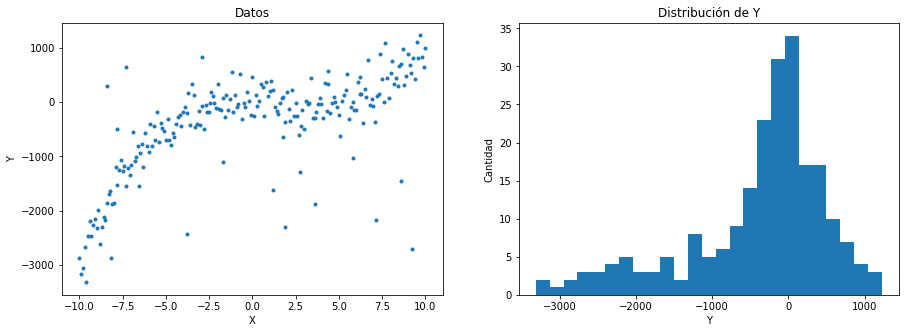

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(X, y, '.')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Datos")

plt.subplot(122)
plt.hist(y, 25)
plt.title("Distribución de Y")
plt.xlabel("Y")
plt.ylabel("Cantidad")
plt.show()

**Inciso b)** Eliminación de outliers.

Como se puede observar en la gráfica y en el histograma, no podemos simplemente eliminar los puntos que no estén dentro de dos desviaciones estandar, ya que la coordenada $y$ de los outliers es la misma que la coordenada $y$ de datos que no lo son. 

La solución que implementé fue segmentar mis datos a lo largo del eje $X$ para ahora sí elimiar los datos que no estén dentro de 2 desviaciones estandar según el segmento en el que estén.

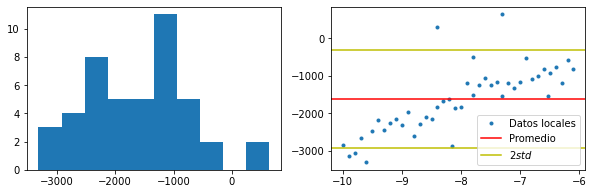

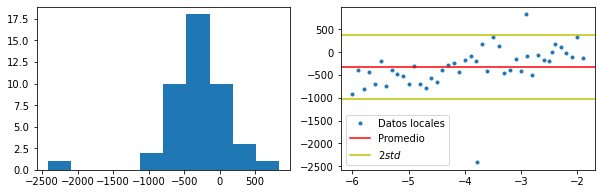

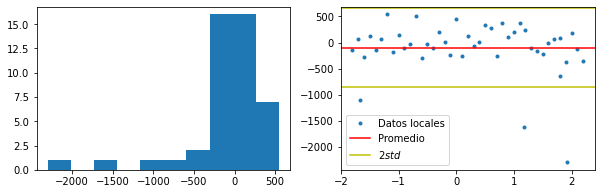

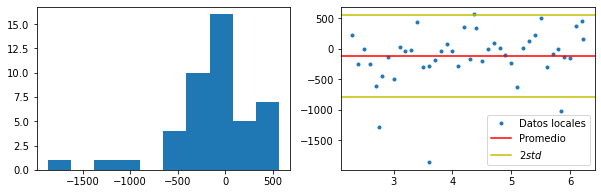

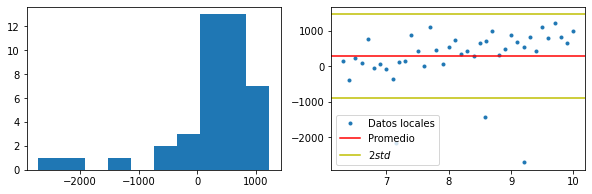

In [17]:
i = 1
step = int(len(data) / 5) + 1
inliers = list()
for q in range(0, len(data), step):
    segment = data.iloc[q:i*step]
    
    std = np.std(segment["Y"])
    cutoff = 1.5*std
    mean = np.mean(segment["Y"])
    
    plt.figure(figsize=(10,3))
    plt.subplot(122)
    plt.plot(segment["X"], segment["Y"], '.', label="Datos locales")
    plt.axhline(y=mean, linestyle='-', color="r", label="Promedio")
    plt.axhline(y=mean+cutoff, linestyle='-', color="y", label="$2std$")
    plt.axhline(y=mean-cutoff, linestyle='-', color="y")
    plt.legend()
    plt.subplot(121)
    plt.hist(segment["Y"])
    plt.show()
    
    for t in segment["Y"]:
        if t >= mean - cutoff and t <= mean + cutoff:
            inliers.append(1)
        else:
            inliers.append(-1)
    i += 1

inliers = np.array(inliers)
clean_data = data[inliers==1]
X = reshape(clean_data["X"])
y = reshape(clean_data["Y"])

In [18]:
print("Tamaño original:", len(data))
print("Tamaño nuevo:", len(clean_data))
print("Se eleiminaron:", len(data) - len(clean_data))

Tamaño original: 221
Tamaño nuevo: 204
Se eleiminaron: 17


Se eliminaron solo los datos en rojo, un total de 17. 
Y como podemos ver, la distribución se mantiene igual, con lo cuál no podríamos simplemente eliminar los datos fuera de las dos desviaciones estandar (como se mencionó antes).

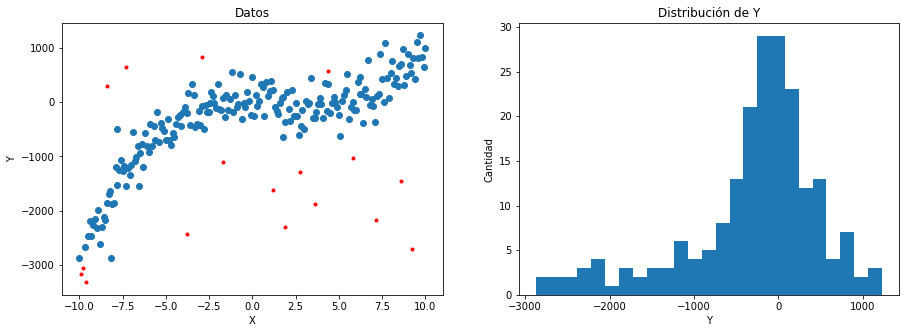

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(data["X"], data["Y"], '.', c='r')
plt.plot(X, y, 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Datos")

plt.subplot(122)
plt.hist(y, 25)
plt.title("Distribución de Y")
plt.xlabel("Y")
plt.ylabel("Cantidad")
plt.show()

In [20]:
m = np.mean(y)
print("Mean:", m)
print("STD:", np.std(y))
print("Var:", np.var(y))
print("Corr:\n", data.corr())

Mean: -300.2387632880349
STD: 806.2237146924688
Var: 649996.6781325232
Corr:
           X         Y
X  1.000000  0.659872
Y  0.659872  1.000000


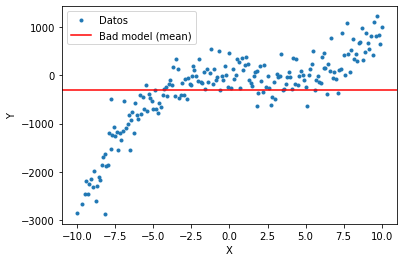

In [21]:
plt.plot(X, y, '.', label="Datos")
plt.axhline(y=m, linestyle='-', color='r', label='Bad model (mean)')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

**Incicso c)** Entrenamiento del modelo.

In [22]:
model = LinearRegression()
poly = PolynomialFeatures(degree=3, include_bias=False).fit(X)
X_poly = poly.transform(X)
model.fit(X_poly, y)

y_predicts = model.predict(X_poly)
mse = mean_squared_error(y, y_predicts)
print("R2:", model.score(X_poly, y))
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

R2: 0.8834935754731521
MSE: 75728.78892354865
RMSE: 275.1886424319664


**Inciso d)** Interpretación $R^2$

Nos resultó que estamos describiendo con este modelo al 88% de los datos aproximadamente.

**Inciso c)** Parámetros del modelo

In [23]:
print(model.coef_)
print(model.intercept_)

[[-8.26584155 -9.57710898  2.08261461]]
[-2.95449706]


$$y(x) = -2.95449706 + -8.26584155x - 9.57710898x^2 + 2.08261461x^3$$

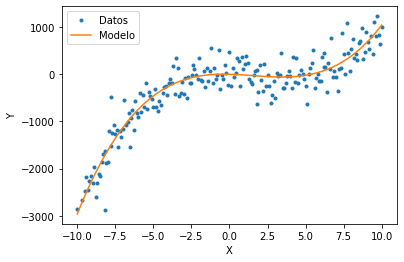

In [24]:
n_new = 100
X_new = np.linspace(-10,10, n_new).reshape(n_new, 1)

plt.plot(X, y, '.', label="Datos")
plt.plot(X_new, model.predict(poly.transform(X_new)), '-', label="Modelo")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

**Inciso e)** Histograma de residuales

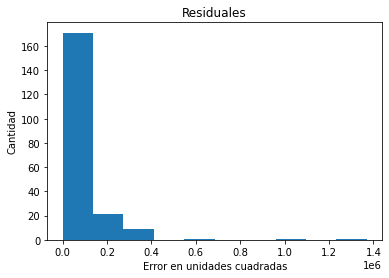

In [25]:
residuals = (y - model.predict(X_poly)) ** 2

plt.hist(residuals)
plt.xlabel("Error en unidades cuadradas")
plt.ylabel("Cantidad")
plt.title("Residuales")
plt.show()

**Inciso f)** Error esperado.

De manera similar al ejercicio 2, sacamos la raíz cuadrada porque el error es en unidades cuadradas.

In [26]:
print("Expected error:", np.sqrt(np.mean(residuals)), "unidades")

Expected error: 275.1886424319664 unidades


**Inciso g)** Error menor a 500 unidades

In [27]:
units = 500
cdf = ECDF(residuals.T[0,:])
print("Probabilidad de que el error sea menor a {} unidades:\n{}".format(units, cdf(units**2)))

Probabilidad de que el error sea menor a 500 unidades:
0.926470588235294
